<a href="https://colab.research.google.com/github/Amankr351/Hotel-Booking-Analysis.../blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hotel Booking Analysis...



In [1]:
#Importing all the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, date


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Hotel Bookings.csv', encoding = 'ISO-8859-1')
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


## Data preparation and cleaning

In [4]:
data.shape   #The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

(119390, 32)

In [5]:
data.info()   #The info() method prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.isnull().sum()  #To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data[['country', 'children', 'agent', 'company']].tail(50)

,country,children,agent,company
119340,PRT,0.0,14.0,NaN
119341,DNK,0.0,9.0,NaN
119342,SWE,0.0,9.0,NaN
119343,ESP,0.0,28.0,NaN
119344,LUX,0.0,9.0,NaN
119345,ZAF,0.0,9.0,NaN
119346,ESP,0.0,9.0,NaN
119347,SWE,0.0,9.0,NaN
119348,SWE,0.0,9.0,NaN
119349,DEU,0.0,9.0,NaN


In [8]:
data['country'].fillna('GBR', inplace = True)               #After filling the value we can check and see if that has been correctly placed.


In [9]:
data['children'].fillna(data['children'].mode()[0], inplace = True)

In [10]:
data['children'] = data.children.astype(int)

In [11]:
data.drop(['company'], axis=1, inplace=True)   #We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

In [12]:
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [13]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
data.describe()   #The describe() method returns description of the data in the DataFrame.

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


## Exploratory analysis and visulization

---



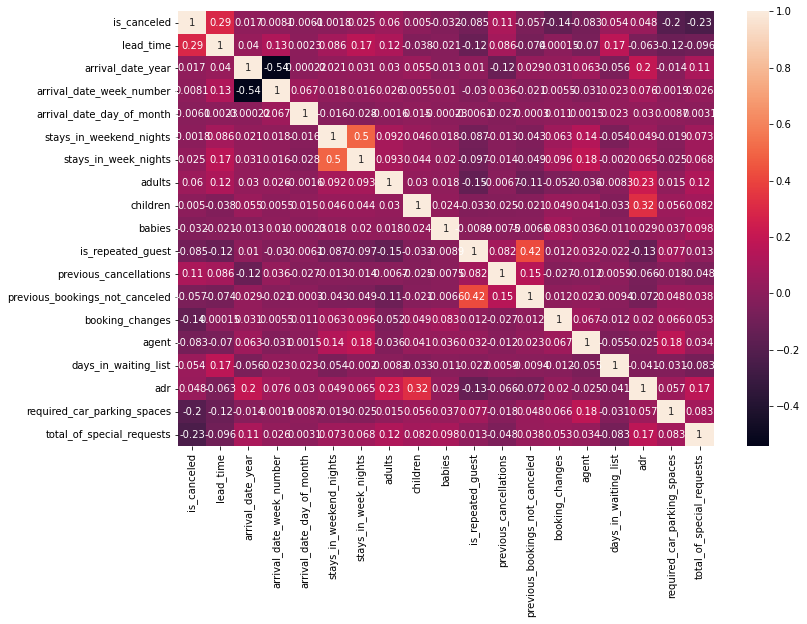

In [15]:
corr_df = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, 
            annot=True);

In [16]:
data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [17]:
sns.set_style("whitegrid")

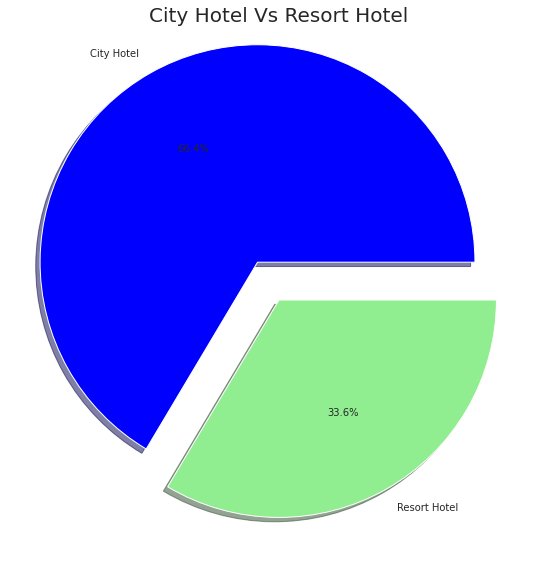

In [18]:
plt.figure(figsize=(10,10))
labels = data['hotel'].value_counts(sort = True).index
sizes = data['hotel'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('City Hotel Vs Resort Hotel',size = 20)
plt.show()

In [19]:
y = data['arrival_date_month'].value_counts().index
x = data['arrival_date_month'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

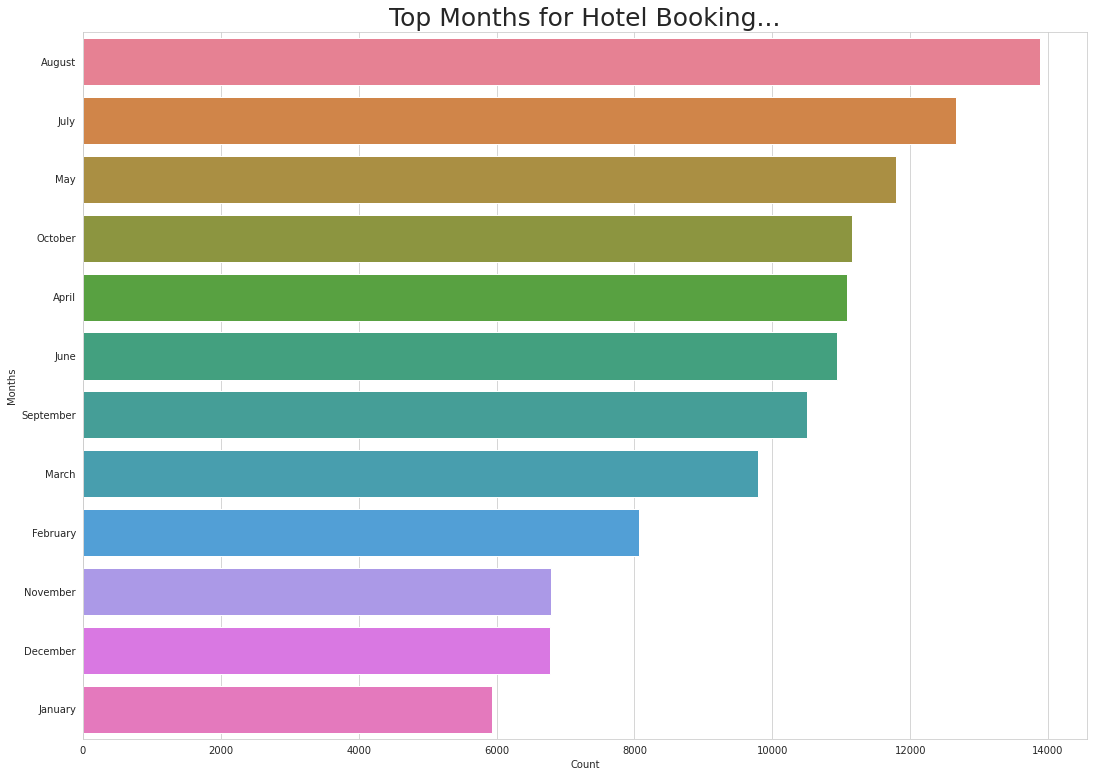

In [20]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Months")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top Months for Hotel Booking...", fontsize = 25);

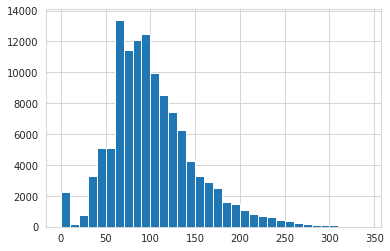

In [21]:
plt.hist(data.adr, bins= np.arange(0, 350,  10));

In [22]:
Country_df = data.groupby('country')[['adr']].sum().sort_values(by='adr', ascending=False).head(20)
Country_df

,adr
country,
PRT,4472295.67
GBR,1194169.11
FRA,1141663.93
ESP,1002417.13
DEU,760739.16
ITA,429128.95
IRL,331398.58
BEL,266631.51
USA,257914.75


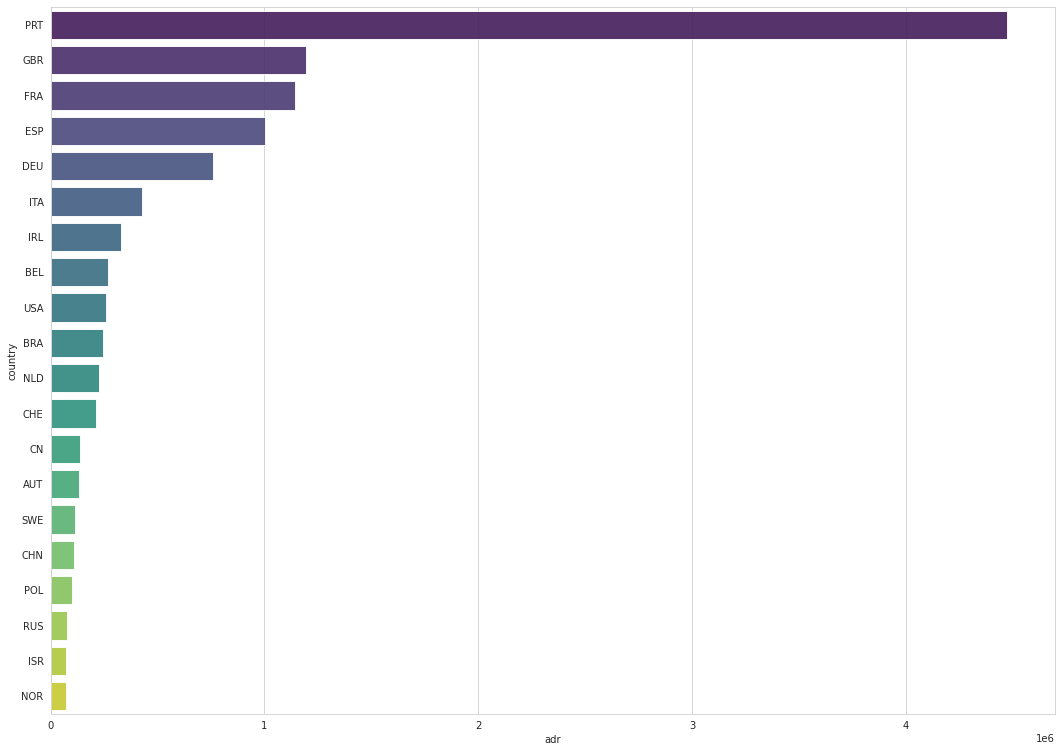

In [23]:
plt.figure(figsize=(18,13))
sns.barplot(x = Country_df.adr, y = Country_df.index, alpha =0.9, palette= "viridis");

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


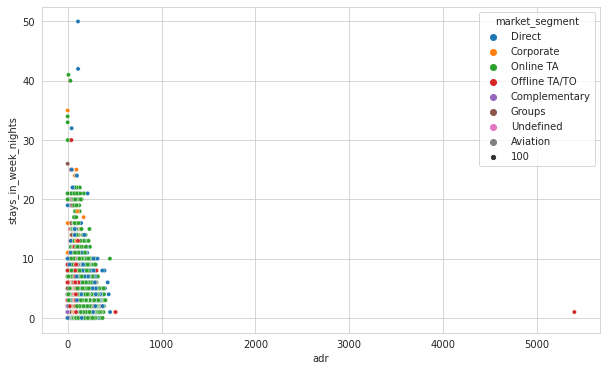

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.adr, data.stays_in_week_nights, hue = data.market_segment, size = 100);

In [25]:
data.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


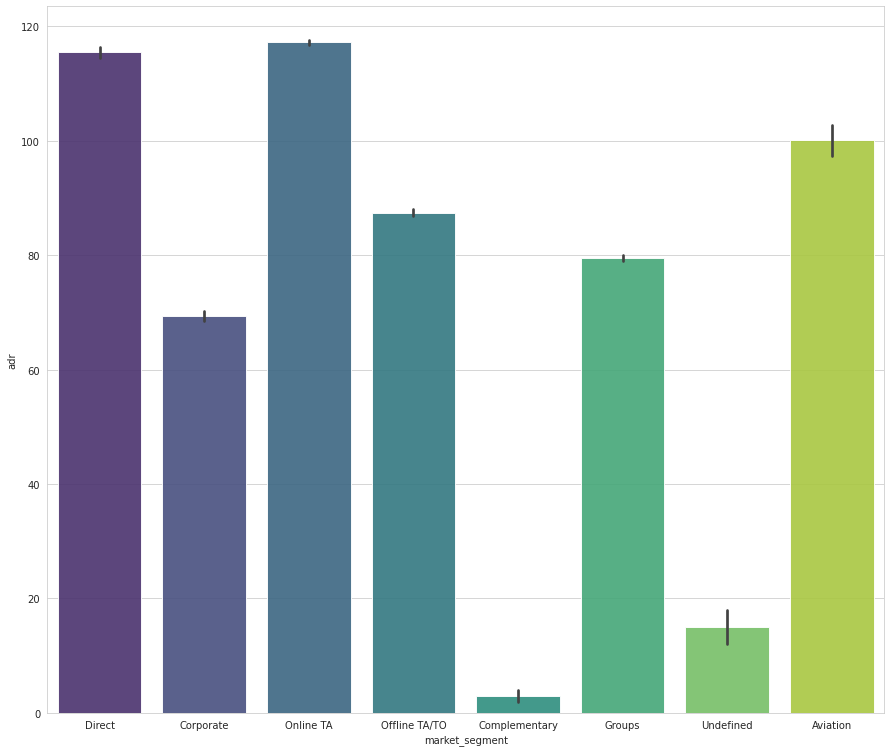

In [26]:
plt.figure(figsize=(15,13))
sns.barplot(data.market_segment, data.adr, alpha =0.9, palette= "viridis");

In [27]:
month_wise = data.groupby(['arrival_date_month', 'customer_type'])[['stays_in_week_nights']].sum().unstack()
month_wise

stays_in_week_nights                                
customer_type                  Contract Group Transient Transient-Party
arrival_date_month                                                     
April                               773    58     20193            5791
August                             2489   206     30762            5904
December                            407    88     12715            2774
February                            217    87     14425            2843
January                             113    54     10970            1860
July                               2288    45     28603            4585
June                               2071    75     23296            3606
March                               200    80     18850            5949
May                                1498    53     21440            5389
November                            532   118     12376            3307
October                            1980   208     14971            7736
September                          3129   115     16178            7104

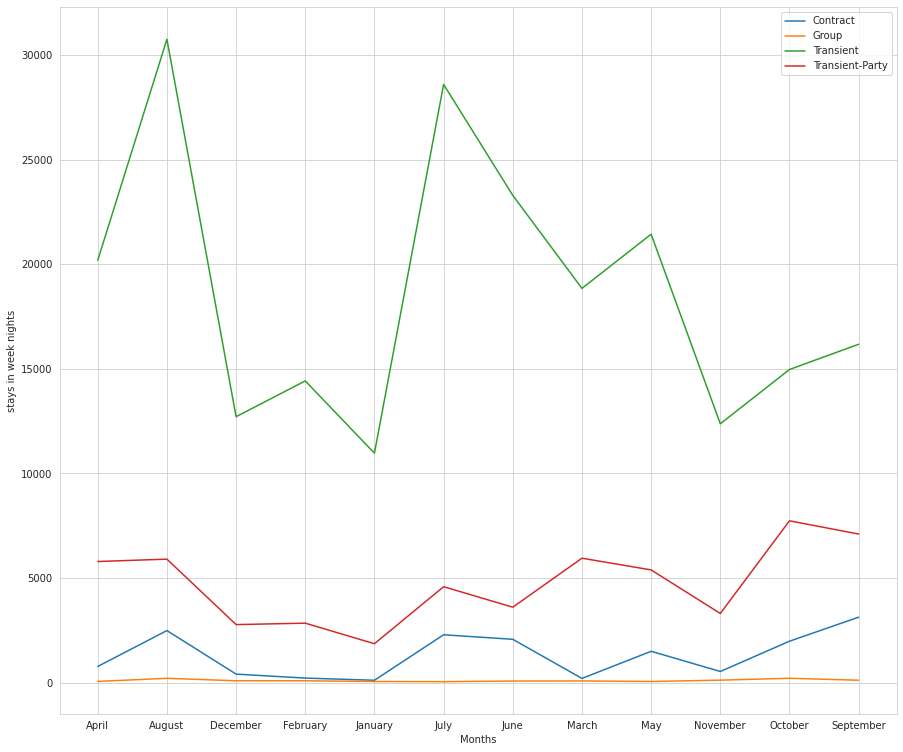

In [28]:
plt.figure(figsize=(15,13))
plt.ylabel("stays in week nights")
plt.xlabel("Months")
plt.plot(month_wise.index, month_wise.stays_in_week_nights);
plt.legend(['Contract',	'Group',	'Transient',	'Transient-Party']);

In [29]:
data.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

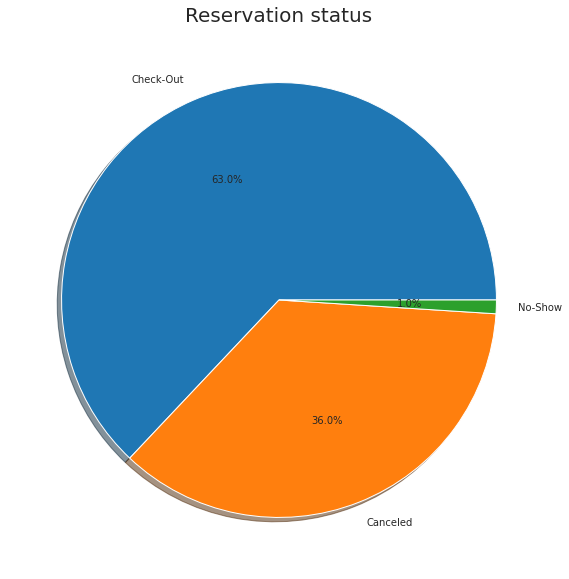

In [30]:
plt.figure(figsize=(10,10))
labels = data['reservation_status'].value_counts(sort = True).index
sizes = data['reservation_status'].value_counts(sort = True)
plt.pie(sizes, explode=None, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Reservation status',size = 20)
plt.show()

In [31]:
data.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

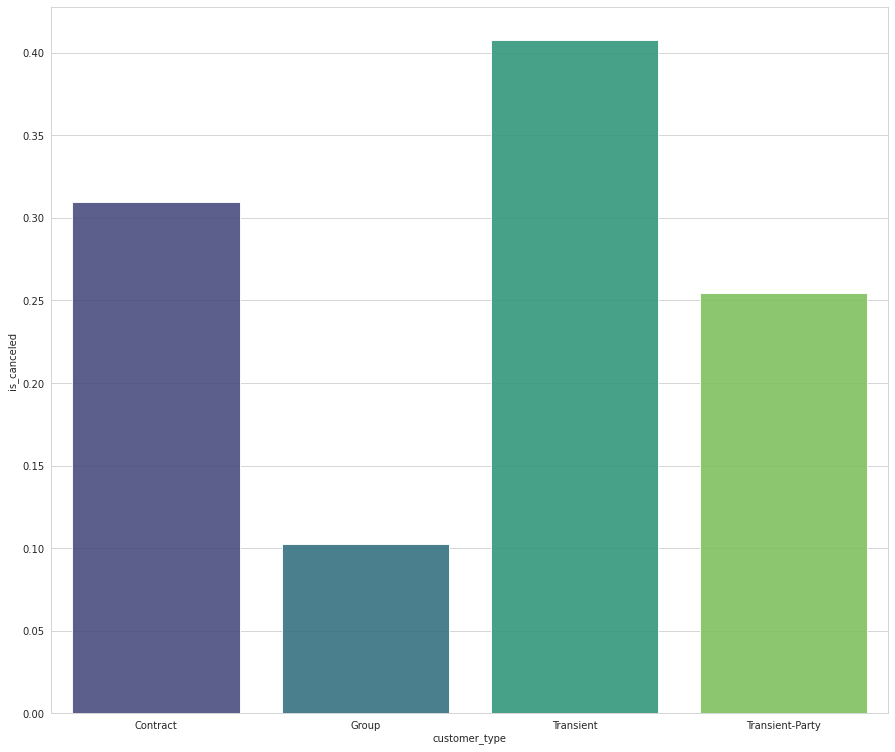

In [42]:
booking_cancellations = data.groupby("customer_type")[['is_canceled']].mean()
plt.figure(figsize=(15,13))
sns.barplot(x=booking_cancellations.index, y=booking_cancellations.is_canceled, alpha =0.9, palette= "viridis");

##Challenges

(1) There was a lot of duplicate data.

(2) Data was present in wrong datatype format.

(3) Choosing appropriate visualization techniques to use was difficult.

(4) A lot of null values were there in the dataset.



